# Experiment - 2 -Answers

## Que 1: Write expression for net signal power at the receiver?

Ans: 
the link budget expression for the SNR required is given as :-

$SNR_{req}$ = $P + (dB) + -L(dB) -M(dB) + G_r(dB) -L_C(dB) - (N + I) + B$

**Where**,

- SNR_req     - Not signal power of reciver.
- G_t         - Transmit - antenna gain
- I           - Median link propagation less.
- M           - Margin
- G_r         - Mobilw receive antenna gain.
- L_c         - Cabling Losses
- N+I         - Receiver (noise + inerface) by recasting required transmit process.

$P_t$ = $SNR_{req} - G_t (dB) + L(dB) + M(dB) - G_r(dB) + L_c (dB) + (N + I)(dB)$ 

----------------------------

## Que 2:Derive an expression of received power for Free space propogation model ?

Ans:

Free space propagation model predicts the received signal strength when there is an unobstructed line of sight path between transmitter and receiver. It assumes the ideal propagation condition that the environment is empty between the transmitter and receiver.
The eqution for received power is given by:

![friss model](https://www.gaussianwaves.com/gaussianwaves/wp-content/uploads/2020/06/Friis-Free-Space-Propagation-Model-equation-1-300x67.png)

**where,** 

- Pr - is the received signal power in Watts.
- Pt - is the power of the transmitted signal’s Watts.
- L - represents other losses.
- λ - is the wavelength of carrier in meters. 
- Gt and Gr - are the gains of transmitter and receiver antennas. 

It is also can be modified to accommodate different environments, on the reason that the received signal decreases as the nth power of distance, 

![friss model II](https://www.gaussianwaves.com/gaussianwaves/wp-content/uploads/2020/06/Friis-Free-Space-Propagation-Model-equation-2-300x62.png)
for freespace path-loss exponent (PLE).

-------------------------------------------

## Que 3: What is meant by small scale fading? 

Ans:

Small-scale fading refers to the rapid changes of the amplitude and phase of a radio signal over a short period of time (on the order of seconds) or a short distance (a few wavelengths). Small-scale fading depends on the nature of the transmitted signal with respect to the characteristics of the channel. In a mobile-radio environment, each path has its own Doppler shift, time delay, and path attenuation, and multipath propagation results in a time-varying signal as the mobile moves position.

# Code (Octave) :-

In [1]:
clc;clear all;
%----------Input Section---------------
Hbts= 50 ;%Height measured from the base of the BTS tower to the radiation centerline
Tbts = 350 ;%Terrain elevation at the location of the BTS
Htav= 300;%Height of the average terrain (from 3 Km to 15 km distance from the BTS)
Hm=3 ;%Height of the mobile antenna in meters
f=900 ;%100:100:3000; %Range of frequencies in MHz
d=0.5:0.5:15; %Range of Tx-Rx separation distances in Kilometers
Pt = 0.020; %Power transmitted by the BTS antenna in Watts
Gt= 10; %BTS antenna gain in dBi
%--------------------------------------
Hb=Hbts+Tbts-Htav ;%Effective Height of the BTS antenna in meters
                    %Cell array to store various model names
models = {'Big City (Urban model)';
            'Small & Medium City (Urban model)';
            'Sub-urban environment';
            'Open Rural environment'};
            
display('Hata-Okumura Model');
display(['1 ' models{1,1}]);
display(['2 ' models{2,1}]);
display(['3 ' models{3,1}]);
display(['4 ' models{4,1}]);
reply = input('Select Your choice of environment : ','s');

Hata-Okumura Model
1 Big City (Urban model)
2 Small & Medium City (Urban model)
3 Sub-urban environment
4 Open Rural environment
Select Your choice of environment :2


In [2]:
if 0<str2num(reply)<4
    modelName = models{str2num(reply),1};
    display(['Chosen Model : ' modelName])
else
    error('Invalid Selection');
end
switch reply
    case'1',
    C=0;
        if f<=200
        aHm=8.29*(log10(1.54*Hm))^2-1.1;
        else
        aHm=3.2*(log10(11.75*Hm))^2-4.97;
        end
    case'2',
        C=0;
        aHm = (1.1*log10(f)-0.7)*Hm-(1.56*log10(f)-0.8);
    case'3',
        aHm = (1.1*log10(f)-0.7)*Hm-(1.56*log10(f)-0.8);
        C=-2*(log10(f/28))^2-5.4;
    case'4',
        aHm = (1.1*log10(f)-0.7)*Hm-(1.56*log10(f)-0.8);
        C=-4.78*(log10(f))^2+18.33*log10(f)-40.98;
    otherwise ,
        error('Invalid model selection');
    end

Chosen Model : Small & Medium City (Urban model)


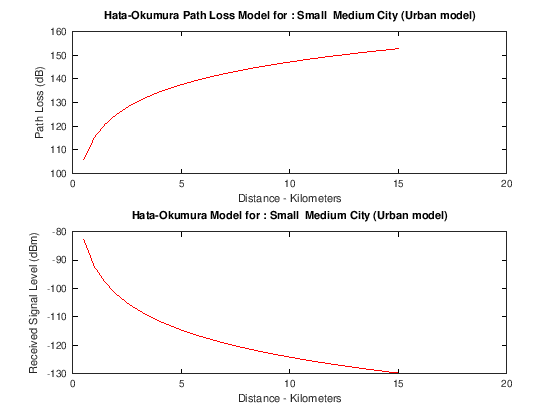

In [3]:
A = 69.55 + 26.16*log10(f) - 13.82*log10(Hb)-aHm;
B = 44.9 - 6.55*log10(Hb);
PL=A+B*log10(d)+C;
subplot(2,1,1)
plot(d,PL,'r','LineWidth',2);
title(['Hata-Okumura Path Loss Model for : ' modelName]);
xlabel('Distance - Kilometers');
ylabel('Path Loss (dB)');
%Compute Received Signal Level
Pr = 10*log10(Pt*1000)+Gt-PL;
subplot(2,1,2)
plot(d,Pr,'r','LineWidth',2);
title(['Hata-Okumura Model for : ' modelName]);
xlabel('Distance - Kilometers');
ylabel('Received Signal Level (dBm)');